In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numba import jit, vectorize, float64, int64
%matplotlib inline

## This is one dimensional comparison
### Assume gradient is known 
$grad(\theta)=-4\theta+4\theta^3$

In [3]:
#gradient
@jit([float64(float64)])
def grad(theta):  
    """this is the gradient function"""
    return -4*theta+4*theta**3

### Regulat python

In [5]:
def hmc_1d(grad,theta0,M,C,epsilon,iter=1000):
    """
    This function outputs the 1 dimiension Hamilton Monte Carlo samples without M-H correction.
    
    Args: 
        grad:the gradient for energy of posterior
        theta0: the initial point of theta, the parameter of interest
        grad: the gradient of the potential
        M: the mass
        C: the C term, where C*M^{-1} is the friction
        epsilon: stepsize
        iter: iteration number, 1000 by default
    """
    r=np.random.normal(0,np.sqrt(M))
    theta=theta0
    theta_save=np.zeros(iter)
    r_save=np.zeros(iter)
    for t in range(iter):
        theta=theta+epsilon*r/M
        r=r-grad(theta)*epsilon-epsilon*C*r/M+np.random.normal(0,np.sqrt(2*epsilon*C))
        theta_save[t]=theta
        r_save[t]=r
    return np.c_[theta_save,r_save]

/opt/conda/lib/python3.5/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


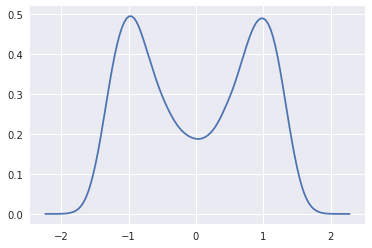

In [16]:
#the posterior density
theta0=0
M=1
C=1
epsilon=.1
k=hmc_1d(grad,theta0,M,C,epsilon,iter=300000)
sns.kdeplot(k[:,0])
pass

In [17]:
%timeit hmc_1d(grad,theta0,M,C,epsilon,iter=300000)

1.52 s ± 18.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Numba Version

In [18]:
@jit(float64[:,:](float64[:],float64,float64,float64,float64, int64))
def hmc_1dnb(grad,theta0,M,C,epsilon,iter=1000):
    """
    This function outputs the 1 dimiension Hamilton Monte Carlo samples without M-H correction.
    
    Args: 
        grad:the gradient of energy of posterior
        theta0: the initial point of theta, the parameter of interest
        grad: the gradient of the potential
        M: the mass
        C: the C term, where C*M^{-1} is the friction
        epsilon: stepsize
        iter: iteration number, 1000 by default
    """
    r=np.random.normal(0,np.sqrt(M))
    theta=theta0
    theta_save=np.zeros(iter)
    r_save=np.zeros(iter)
    for t in range(iter):
        theta=theta+epsilon*r/M
        r=r-grad(theta)*epsilon-epsilon*C*r/M+np.random.normal(0,np.sqrt(2*epsilon*C))
        theta_save[t]=theta
        r_save[t]=r
    return np.c_[theta_save,r_save]

/opt/conda/lib/python3.5/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


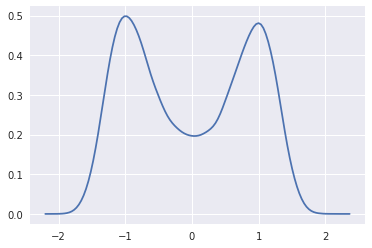

In [20]:
theta0=0
M=1
C=1
epsilon=.1
iter=1000
k=hmc_1dnb(grad,theta0,M,C,epsilon,iter=300000)
sns.kdeplot(k[:,0])
pass

In [23]:
%timeit hmc_1dnb(grad,theta0,M,C,epsilon,iter=300000)

1.45 s ± 14.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
